In [1]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression

sns.set(style="whitegrid", context="talk")

In [2]:
# Load the dataset
# datasource: https://www.kaggle.com/datasets/saurabhbadole/life-expectancy-based-on-geographic-locations
datapath = "https://raw.githubusercontent.com/Sahasri12/Clustering_and_Fitting/refs/heads/main/data.csv"
df = pd.read_csv(datapath)

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2923,Zimbabwe,2004,Developing,44.3,723,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2924,Zimbabwe,2003,Developing,44.5,715,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2925,Zimbabwe,2002,Developing,44.8,73,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2926,Zimbabwe,2001,Developing,45.3,686,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2927,Zimbabwe,2000,Developing,46.0,665,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [5]:
df.shape

(2928, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   object 
 1   Year                             2928 non-null   int64  
 2   Status                           2928 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   int64  
 5   infant deaths                    2928 non-null   int64  
 6   Alcohol                          2735 non-null   float64
 7   percentage expenditure           2928 non-null   float64
 8   Hepatitis B                      2375 non-null   float64
 9   Measles                          2928 non-null   int64  
 10   BMI                             2896 non-null   float64
 11  under-five deaths                2928 non-null   int64  
 12  Polio               

In [7]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.00000,2928.000000,2928.000000,2928.000000,2735.000000,2928.000000,2375.000000,2928.000000,2896.000000,2928.000000,2909.000000,2702.000000,2909.000000,2928.000000,2485.000000,2.284000e+03,2896.000000,2896.000000,2768.000000,2768.000000
mean,2007.50000,69.224932,164.796448,30.407445,4.614856,740.321185,80.960842,2427.855874,38.235394,42.179303,82.548298,5.930163,82.321416,1.747712,7494.210719,1.276454e+07,4.850622,4.881423,0.627419,11.999639
std,4.61056,9.523867,124.292079,118.114450,4.050749,1990.930605,25.018337,11485.970937,19.959590,160.700547,23.416674,2.483273,23.706644,5.085542,14282.251492,6.103765e+07,4.420829,4.509609,0.210978,3.346440
min,2000.00000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.75000,63.100000,74.000000,0.000000,0.905000,4.853964,77.000000,0.000000,19.300000,0.000000,78.000000,4.260000,78.000000,0.100000,463.852618,1.966738e+05,1.600000,1.575000,0.493000,10.100000
50%,2007.50000,72.100000,144.000000,3.000000,3.770000,65.611455,92.000000,17.000000,43.350000,4.000000,93.000000,5.750000,93.000000,0.100000,1764.973870,1.391756e+06,3.300000,3.400000,0.677000,12.300000
75%,2011.25000,75.700000,228.000000,22.000000,7.715000,442.614322,97.000000,362.250000,56.100000,28.000000,97.000000,7.490000,97.000000,0.800000,5932.899677,7.426746e+06,7.200000,7.200000,0.779250,14.300000
max,2015.00000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [8]:
print(df.select_dtypes(include=[np.number]).corr())

                                     Year  Life expectancy  Adult Mortality  \
Year                             1.000000         0.170033        -0.079052   
Life expectancy                  0.170033         1.000000        -0.696359   
Adult Mortality                 -0.079052        -0.696359         1.000000   
infant deaths                   -0.036464        -0.196557         0.078756   
Alcohol                         -0.049175         0.404877        -0.195848   
percentage expenditure           0.032723         0.381864        -0.242860   
Hepatitis B                      0.105898         0.256762        -0.162476   
Measles                         -0.081840        -0.157586         0.031176   
 BMI                             0.104668         0.567694        -0.387017   
under-five deaths               -0.041980        -0.222529         0.094146   
Polio                            0.094498         0.465556        -0.274823   
Total expenditure                0.087309         0.

In [9]:
#check no of missing values
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

In [10]:
# Data Preprocessing
# Impute Categorical features (fill missing with mode)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Impute Numerical features (fill using median)
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].median())

print("\nRemaining missing values after imputation:")
print(df.isna().sum())


Remaining missing values after imputation:
Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


In [11]:
df.shape

(2928, 22)

In [12]:
#EDA
print(df.head())           # Pandas head
print(df.describe())       # Describe statistics
print(df.select_dtypes(include=[np.number]).corr())         # Correlation matrix

       Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0              263   
1  Afghanistan  2014  Developing             59.9              271   
2  Afghanistan  2013  Developing             59.9              268   
3  Afghanistan  2012  Developing             59.5              272   
4  Afghanistan  2011  Developing             59.2              275   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0     

In [13]:
# --- Statistical Moments
columns_to_check = ['Life expectancy', 'GDP']
for col in columns_to_check:
    print(f"\nStats for {col}:")
    print(f"Mean: {df[col].mean():.2f}")
    print(f"Std: {df[col].std():.2f}")
    print(f"Skewness: {df[col].skew():.2f}")
    print(f"Kurtosis: {df[col].kurtosis():.2f}")


Stats for Life expectancy:
Mean: 69.22
Std: 9.52
Skewness: -0.64
Kurtosis: -0.23

Stats for GDP:
Mean: 6627.39
Std: 13316.39
Skewness: 3.54
Kurtosis: 15.08


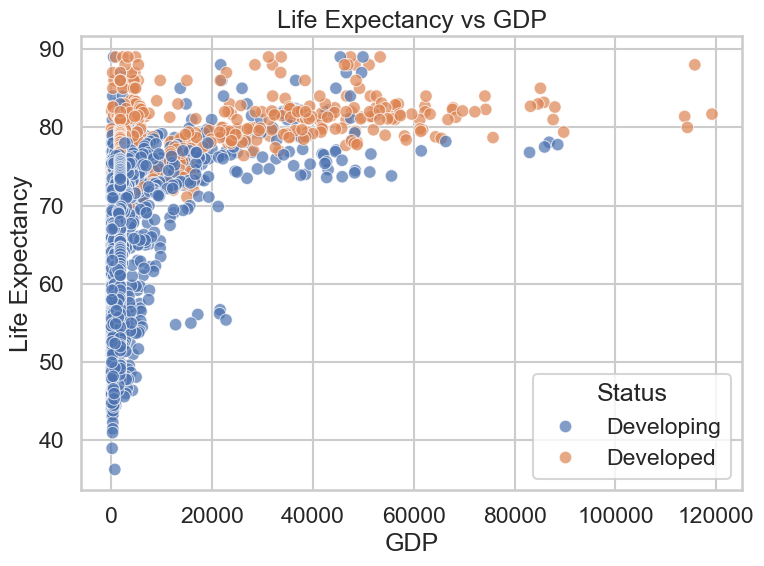

In [14]:
#Relational Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='GDP', y='Life expectancy',
                hue='Status', alpha=0.7)
plt.title('Life Expectancy vs GDP')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.tight_layout()
plt.savefig('relational_plot.png')
plt.show()

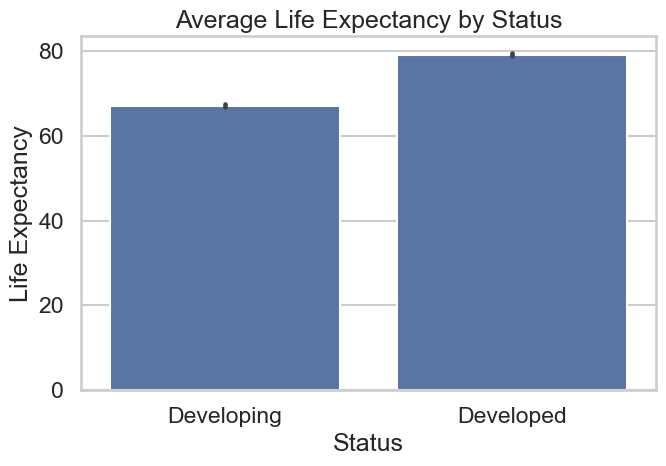

In [15]:
# Categorical plot
plt.figure(figsize=(7, 5))
sns.barplot(data=df, x='Status', y='Life expectancy')
plt.title('Average Life Expectancy by Status')
plt.xlabel('Status')
plt.ylabel('Life Expectancy')
plt.tight_layout()
plt.savefig('categorical_plot.png')
plt.show()

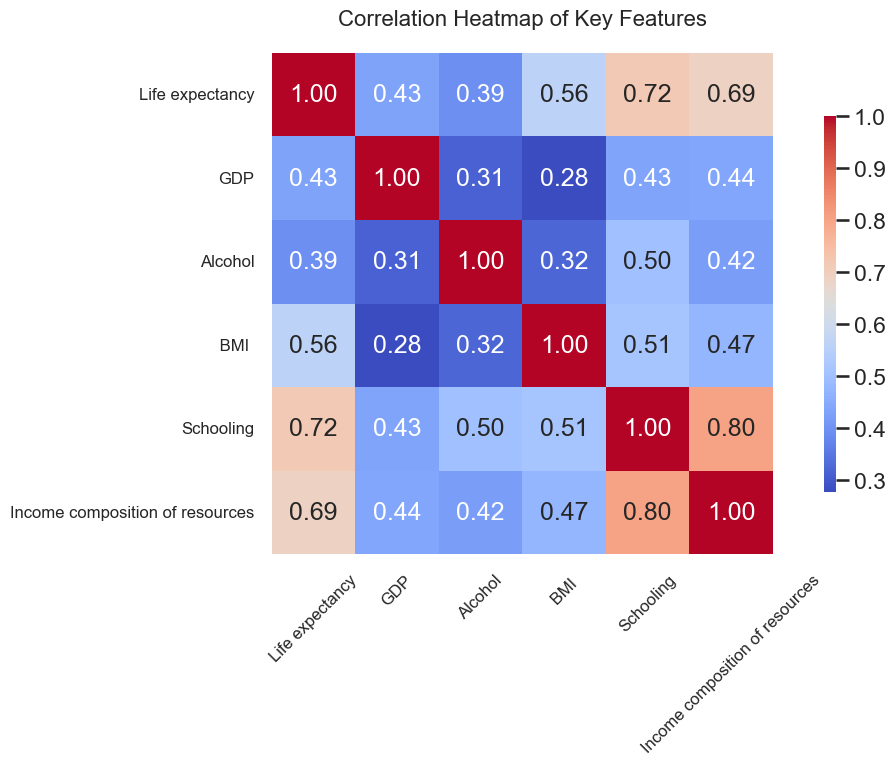

In [16]:
# Statistical Plot
stat_features = [
    'Life expectancy', 'GDP', 'Alcohol',
    ' BMI ', 'Schooling', 'Income composition of resources'
]

plt.figure(figsize=(12, 8))
sns.heatmap(df[stat_features].corr(), annot=True, fmt=".2f",
            cmap='coolwarm', square=True,
            cbar_kws={'shrink': 0.75, 'aspect': 30})
plt.title('Correlation Heatmap of Key Features', fontsize=16, pad=20)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.savefig('statistical_plot.png')
plt.show()

In [17]:
# Statistical Analysis
col = 'Life expectancy'
series = df[col].dropna()

mean = series.mean()
stddev = series.std()
skew = ss.skew(series)
excess_kurtosis = ss.kurtosis(series)

print(f"For {col}:")
print(f"Mean: {mean:.2f}, Standard Deviation: {stddev:.2f}")
print(f"Skewness: {skew:.2f}, Excess Kurtosis: {excess_kurtosis:.2f}")

# Interpretation
if skew > 0.5:
    skew_text = "right skewed"
elif skew < -0.5:
    skew_text = "left skewed"
else:
    skew_text = "not skewed"

if excess_kurtosis > 0:
    kurt_text = "leptokurtic"
elif excess_kurtosis < 0:
    kurt_text = "platykurtic"
else:
    kurt_text = "mesokurtic"

print(f"The data was {skew_text} and {kurt_text}.")

For Life expectancy:
Mean: 69.22, Standard Deviation: 9.52
Skewness: -0.64, Excess Kurtosis: -0.24
The data was left skewed and platykurtic.


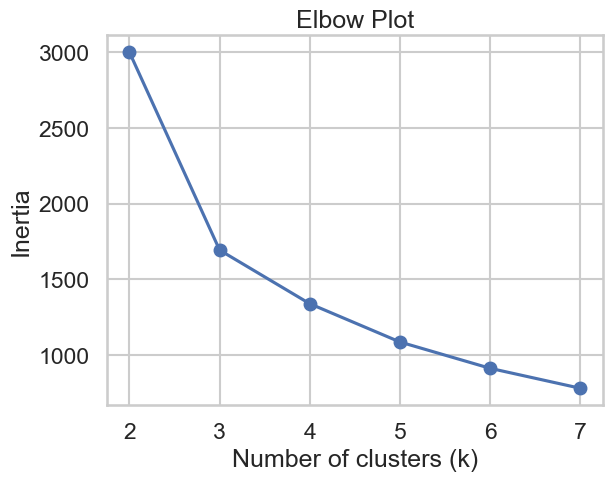

Silhouette Score: 0.453
Inertia: 1692.8338004230493


In [18]:
# K-means Clustering
col1, col2 = 'Alcohol', 'Life expectancy'
data = df[[col1, col2]].dropna().values

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

inertias = []
for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(scaled_data)
    inertias.append(km.inertia_)

plt.figure()
plt.plot(range(2, 8), inertias, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.savefig('elbow_plot.png')
plt.show()

km_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = km_final.fit_predict(scaled_data)

score = silhouette_score(scaled_data, labels)
print(f"Silhouette Score: {score:.3f}")
print(f"Inertia: {km_final.inertia_}")

centers = scaler.inverse_transform(km_final.cluster_centers_)
xkmeans = centers[:, 0]
ykmeans = centers[:, 1]

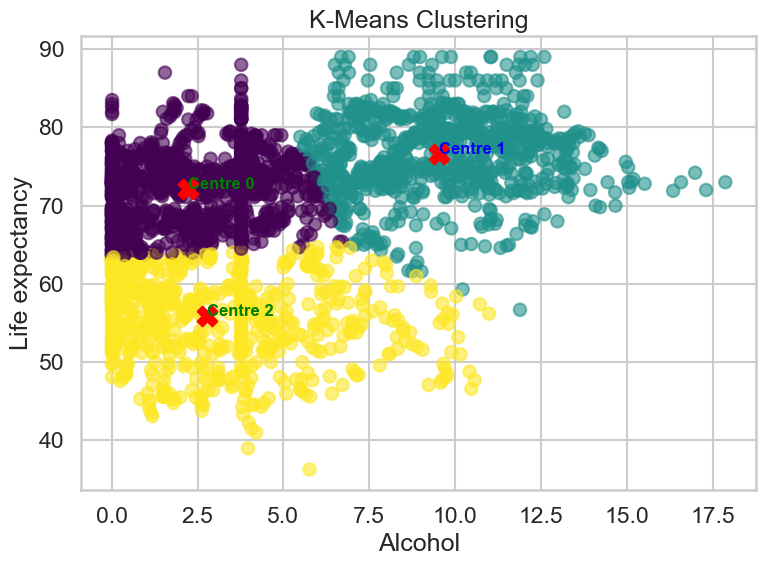

In [19]:
# Cluster Plot with colored centroid labels
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.6)

# Plot centroids
plt.scatter(xkmeans, ykmeans, c='red', marker='X', s=200, label='Centroids')

# Set custom colors for centroid text labels
centroid_colors = ['green', 'blue', 'green']

for i, (x, y) in enumerate(zip(xkmeans, ykmeans)):
    plt.text(x, y, f'Centre {i}', fontsize=12, weight='bold', color=centroid_colors[i])

plt.title('K-Means Clustering')
plt.xlabel(col1)
plt.ylabel(col2)
plt.tight_layout()
plt.savefig('clustering.png')
plt.show()


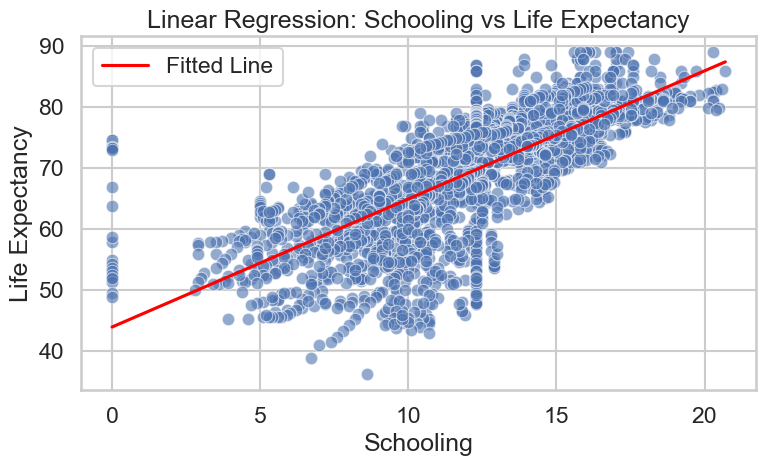

In [20]:
# Linear Fitting(Regression)
data_fit = df[['Schooling', 'Life expectancy']].dropna()
X = data_fit[['Schooling']]
y = data_fit['Life expectancy']

scaler_x = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

model = LinearRegression()
model.fit(X_scaled, y_scaled)

X_grid = np.linspace(X_scaled.min(), X_scaled.max(), 100).reshape(-1, 1)
y_pred = model.predict(X_grid)

x_plot = scaler_x.inverse_transform(X_grid).flatten()
y_plot = scaler_y.inverse_transform(y_pred).flatten()

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X['Schooling'], y=y, alpha=0.6)
plt.plot(x_plot, y_plot, color='red', label='Fitted Line')
plt.title('Linear Regression: Schooling vs Life Expectancy')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.legend()
plt.tight_layout()
plt.savefig('fitting.png')
plt.show()

,Alcohol,Life expectancy,Predicted Cluster
0,2.5,55,2
1,8.0,72,1
2,12.0,83,1


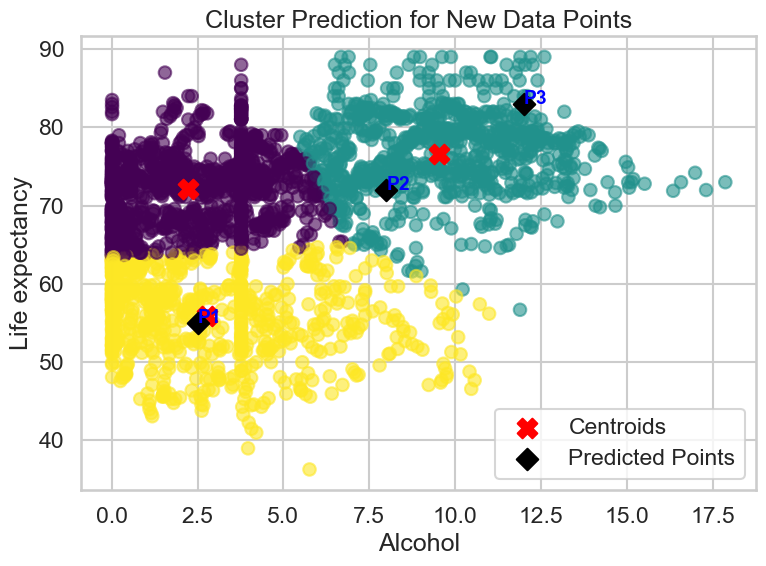

In [21]:
#clustering predictions
# New unseen country data 
new_points = pd.DataFrame({
    'Alcohol': [2.5, 8.0, 12.0],       
    'Life expectancy': [55, 72, 83]     
})

# Scale using same scaler
new_scaled = scaler.transform(new_points.values)
predicted_clusters = km_final.predict(new_scaled)

new_points['Predicted Cluster'] = predicted_clusters
display(new_points)

# Plot predicted points on cluster graph
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(xkmeans, ykmeans, c='red', marker='X', s=200, label='Centroids')

# Plot new points
plt.scatter(new_points['Alcohol'], new_points['Life expectancy'],
            c='black', marker='D', s=120, label='Predicted Points')

for i in range(len(new_points)):
    plt.text(new_points['Alcohol'][i], new_points['Life expectancy'][i],
             f"P{i+1}", color='blue', fontsize=14, weight ='bold')

plt.title('Cluster Prediction for New Data Points')
plt.xlabel('Alcohol')
plt.ylabel('Life expectancy')
plt.legend()
plt.tight_layout()
plt.savefig('clustering_predictions.png')
plt.show()


C:\Users\haris\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,Schooling (Years),Predicted Life Expectancy
0,5,54.496944
1,10,64.992867
2,15,75.488790
3,20,85.984713


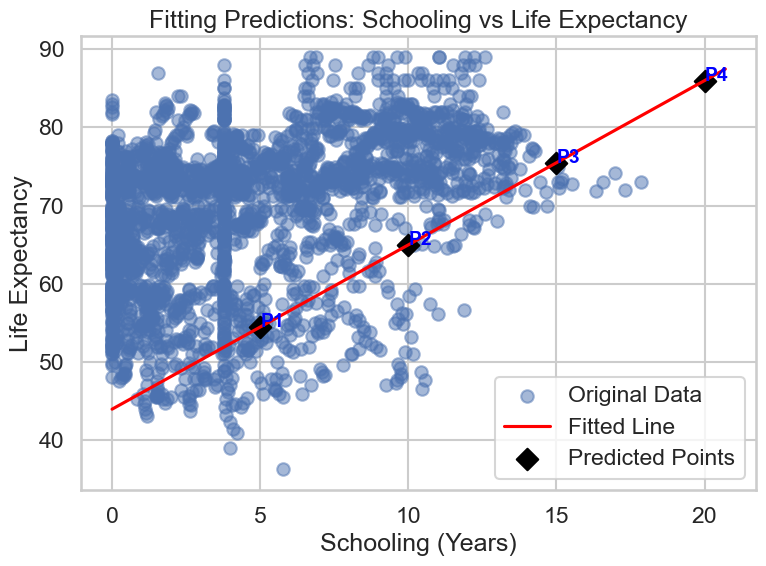

In [22]:
#fitting predictions
# 🔹 Generate new Schooling values to predict
new_schooling = pd.DataFrame({'Schooling': [5, 10, 15, 20]})

# 🔹 Scale using previous x-scaler
new_schooling_scaled = scaler_x.transform(new_schooling.values)

# 🔹 Predict using trained model & inverse transform
predicted_scaled = model.predict(new_schooling_scaled)
predicted_life_exp = scaler_y.inverse_transform(predicted_scaled)

# 🔹 Display prediction results as a table
predictions_df = pd.DataFrame({
    'Schooling (Years)': new_schooling['Schooling'],
    'Predicted Life Expectancy': predicted_life_exp.flatten()
})
display(predictions_df)

# 🔹 Plot original data, fitted line, and predicted points
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, label='Original Data')
plt.plot(x_plot, y_plot, color='red', label='Fitted Line')

# 🔹 Plot predicted points
plt.scatter(new_schooling['Schooling'], predicted_life_exp,
            color='black', marker='D', s=120, label='Predicted Points')

# 🔹 Label predicted points (bold P1, P2, P3, P4)
for i in range(len(new_schooling)):
    plt.text(new_schooling['Schooling'][i],
             predicted_life_exp[i],
             f"P{i+1}",
             color='blue',
             fontsize=14,
             weight='bold')

plt.title('Fitting Predictions: Schooling vs Life Expectancy')
plt.xlabel('Schooling (Years)')
plt.ylabel('Life Expectancy')
plt.legend()
plt.tight_layout()
plt.savefig('fitting_predictions.png')
plt.show()
